In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('final_dataset.csv', index_col='date', parse_dates=True)
df.head()

,Unemployment_Rate_percent,Exports_in_Billions_USD,Exports_%_of_GDP,FDI_Inflows,FDI_%_change,GDP_in_Billions_of_USD,GDP_per_capita,GDP__Annual_%_Change,GDP_Growth_%,GNI_in_Billions_of_USD,...,GNI_Growth_Rate,Hunger_stats_%_of_Population,Imports_in_Billions_of_USD,Imports_%_of_GDP,Inflation_Rate_%,Life_Expectancy_from_Birth_Years,Percent_Under_Pay,Tourism_Spending_in_USD,Tourism_%_of_Exports,Trade_%_of_GDP
date,,,,,,,,,,,,,,,,,,,,,
1991-12-31,6.838,22.943398,8.4942,0.073538,0.0272,270.105342,303.8504,1.0568,1.0568,308.580780,...,0.8649,0.0,22.941359,8.4935,13.8702,58.148,0.0,0,0.0,16.9877
1992-12-31,6.838,25.486029,8.8429,0.276512,0.0959,288.208070,317.5587,5.4824,5.4824,312.509695,...,5.4977,0.0,27.639650,9.5902,11.7878,58.634,0.0,0,0.0,18.4331
1993-12-31,6.838,27.466541,9.8342,0.550370,0.1971,279.295649,301.5008,4.7508,4.7508,300.632783,...,4.8423,0.0,27.419354,9.8173,6.3269,59.120,96.7,0,0.0,19.6515
1994-12-31,6.830,32.361288,9.8881,0.973271,0.2974,327.275583,346.2274,6.6589,6.6589,322.746134,...,6.7921,0.0,33.349577,10.1901,10.2479,59.590,0.0,0,0.0,20.0781
1995-12-31,6.998,39.068855,10.8440,2.143628,0.5950,360.281910,373.6282,7.5745,7.5745,354.316510,...,7.7676,0.0,43.318426,12.0235,10.2249,60.060,0.0,0,0.0,22.8674


In [3]:
train = df.loc[df.index < '2018-12-31']
test  =df.loc[df.index >= '2018-12-31']

TARGET = 'Unemployment_Rate_percent'
FEATURES = ['Exports_in_Billions_USD',
       'Exports_%_of_GDP', 'FDI_Inflows', 'FDI_%_change',
       'GDP_in_Billions_of_USD', 'GDP_per_capita', 'GDP__Annual_%_Change',
       'GDP_Growth_%', 'GNI_in_Billions_of_USD', 'GNI_Per_Capita',
       'GNI_Growth_Rate', 'Hunger_stats_%_of_Population',
       'Imports_in_Billions_of_USD', 'Imports_%_of_GDP',
       'Inflation_Rate_%', 'Life_Expectancy_from_Birth_Years',
       'Percent_Under_Pay', 'Tourism_Spending_in_USD',
       'Tourism_%_of_Exports', 'Trade_%_of_GDP']

In [4]:
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

Linear regression.ipynb

In [5]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)


LinearRegression()

In [6]:
y_pred = linreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(linreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.62


In [7]:
rmse = np.sqrt(mean_squared_error(test.Unemployment_Rate_percent, y_pred))
print(f'RMSE Score on Test set: {rmse:0.2f}')

RMSE Score on Test set: 0.67


C:\Users\91853\AppData\Local\Temp\ipykernel_13948\206086457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['linear_prediction'] = y_pred


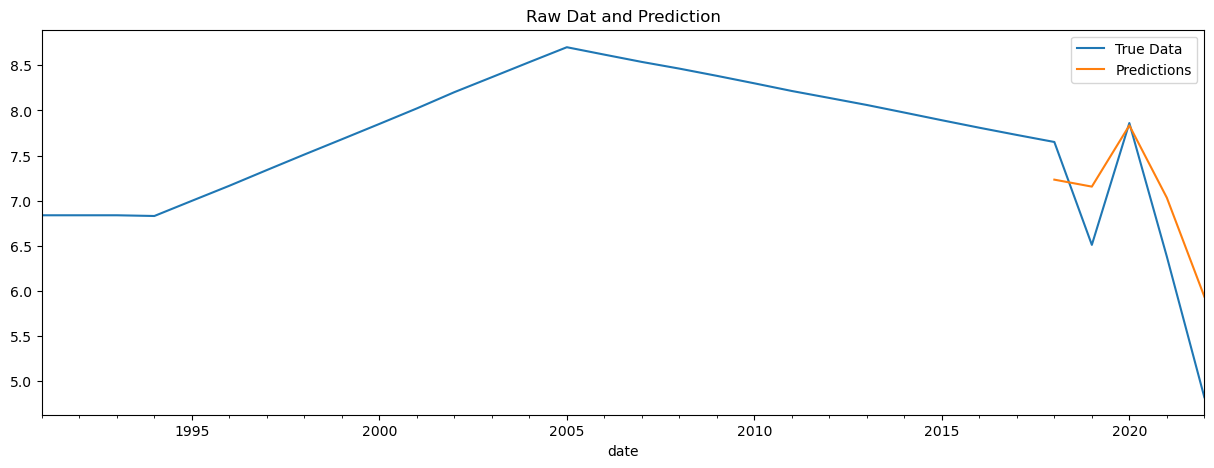

In [8]:
test['linear_prediction'] = y_pred
df = df.merge(test[['linear_prediction']], how='left', left_index=True, right_index=True)
ax = df[['Unemployment_Rate_percent']].plot(figsize=(15, 5))
df['linear_prediction'].plot(ax=ax, style='-')
plt.legend(['True Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

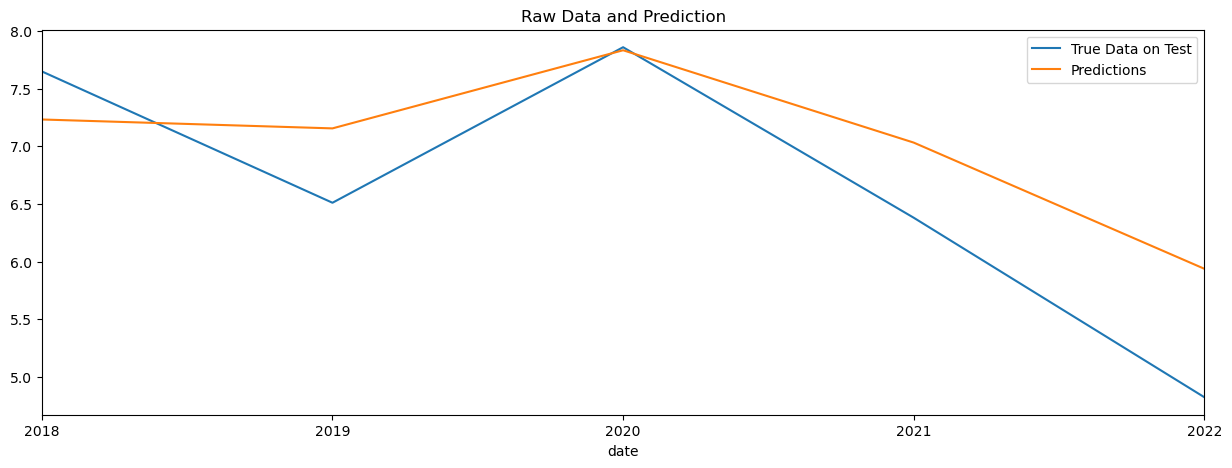

In [9]:
ax = test[['Unemployment_Rate_percent']].plot(figsize=(15, 5))
test['linear_prediction'].plot(ax=ax, style='-')
plt.legend(['True Data on Test', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [10]:
import math
from statistics import mean
test['error'] = np.abs(test[TARGET] - test['linear_prediction'])
errors = test.groupby(test.index)['error'].mean().sort_values(ascending=False)
print(errors)
print(f'mean of errors is : %.2f'%errors.mean())
rmse = math.sqrt(mean_squared_error(test['linear_prediction'],test['Unemployment_Rate_percent']))
print('Mean value is : {}. \nRoot Mean Squared Error is :{}'.format(mean(test['Unemployment_Rate_percent']),rmse))

date
2022-12-31    1.114886
2021-12-31    0.652097
2019-12-31    0.645515
2018-12-31    0.417234
2020-12-31    0.026362
Name: error, dtype: float64
mean of errors is : 0.57
Mean value is : 6.6444. 
Root Mean Squared Error is :0.6722604647482132


Lasso Regressor

In [11]:
from sklearn.linear_model import Lasso

In [12]:
lso = Lasso()
lso.fit(X_train, y_train)

D:\Anaconda\envs\Tensorflow\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.215e+00, tolerance: 9.545e-04
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [13]:
y_pred = lso.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lso.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: -0.51


In [14]:
rmse = np.sqrt(mean_squared_error(test.Unemployment_Rate_percent, y_pred))
print(f'RMSE Score on Test set: {rmse:0.2f}')

RMSE Score on Test set: 1.33


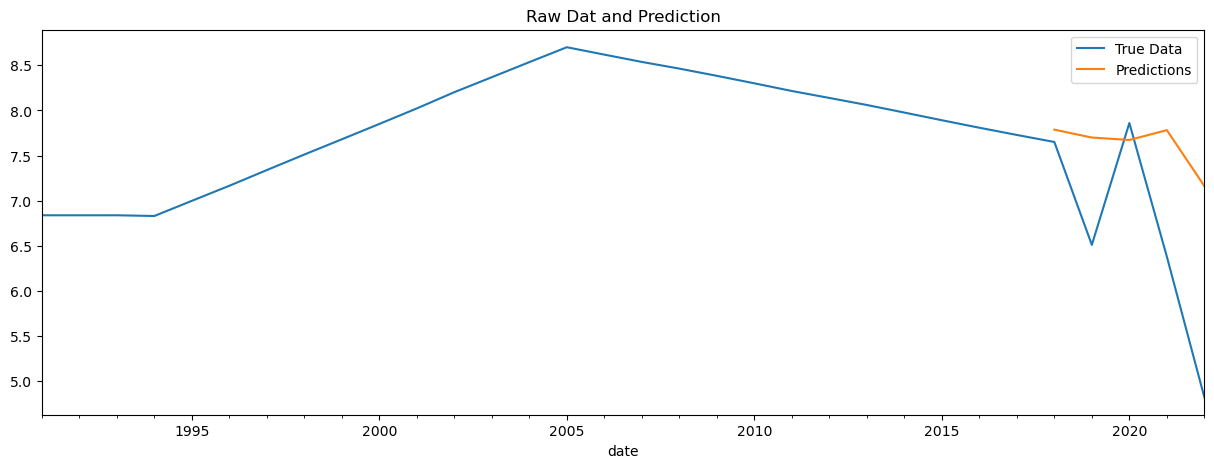

In [15]:
test['lso_prediction'] = y_pred
df = df.merge(test[['lso_prediction']], how='left', left_index=True, right_index=True)
ax = df[['Unemployment_Rate_percent']].plot(figsize=(15, 5))
df['lso_prediction'].plot(ax=ax, style='-')
plt.legend(['True Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

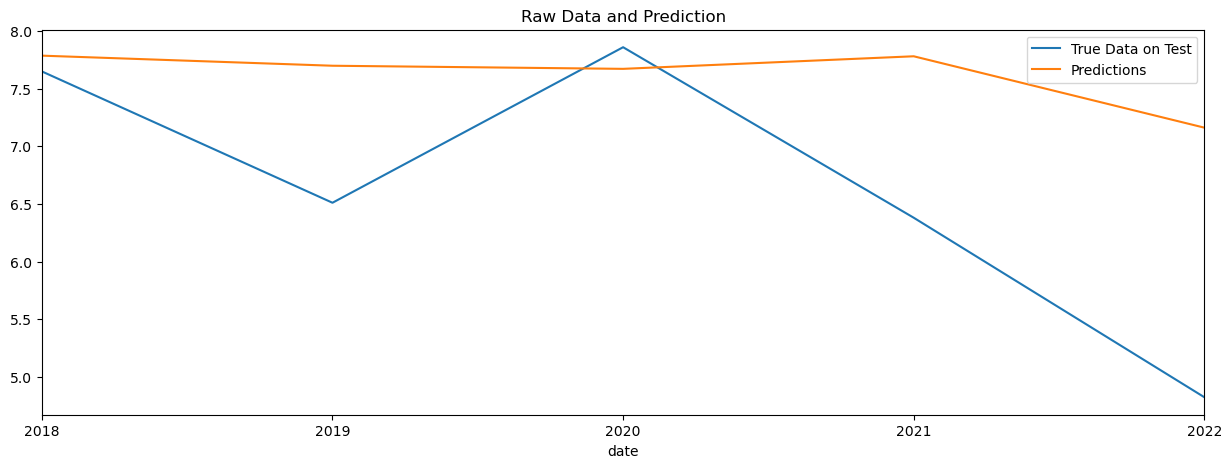

In [16]:
ax = test[['Unemployment_Rate_percent']].plot(figsize=(15, 5))
test['lso_prediction'].plot(ax=ax, style='-')
plt.legend(['True Data on Test', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [18]:
test['error'] = np.abs(test[TARGET] - test['lso_prediction'])
errors = test.groupby(test.index)['error'].mean().sort_values(ascending=False)
print(errors)
print(f'mean of errors is : %.2f'%errors.mean())
rmse = math.sqrt(mean_squared_error(test['lso_prediction'],test['Unemployment_Rate_percent']))
print('Mean value is : {}. \nRoot Mean Squared Error is :{}'.format(mean(test['Unemployment_Rate_percent']),rmse))

date
2022-12-31    2.339814
2021-12-31    1.401385
2019-12-31    1.189294
2020-12-31    0.187742
2018-12-31    0.136826
Name: error, dtype: float64
mean of errors is : 1.05
Mean value is : 6.6444. 
Root Mean Squared Error is :1.3346909348168834


Poission regression